In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn') #ggplot

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
df = data.copy()

In [4]:
df
# df.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Dataset
### checking the meaning of each column
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function (provided some data on
* diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient.)
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [5]:
train, test = train_test_split(df, test_size=0.2, random_state=101, stratify=df['Outcome'])

In [6]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
361,5,158,70,0,0,29.8,0.207,63,0
309,2,124,68,28,205,32.9,0.875,30,1
433,2,139,75,0,0,25.6,0.167,29,0
211,0,147,85,54,0,42.8,0.375,24,0
185,7,194,68,28,0,35.9,0.745,41,1


In [7]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.824104,120.934853,69.641694,20.747557,81.680782,32.133713,0.471132,33.332248,0.348534
std,3.408320,32.743190,18.559774,15.943102,115.604994,7.900605,0.326142,11.742077,0.476895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.245250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.500000,32.400000,0.374500,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,130.000000,36.775000,0.622750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.329000,72.000000,1.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 361 to 418
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


In [9]:
train[train == 0].count()

Pregnancies                  92
Glucose                       5
BloodPressure                24
SkinThickness               178
Insulin                     294
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                     400
dtype: int64

In [10]:
train[train == 0].count()/614*100

Pregnancies                 14.983713
Glucose                      0.814332
BloodPressure                3.908795
SkinThickness               28.990228
Insulin                     47.882736
BMI                          1.465798
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.146580
dtype: float64

In [11]:
train.drop(['SkinThickness', 'Insulin'], axis=1, inplace=True)

In [12]:
train.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
361,5,158,70,29.8,0.207,63,0
309,2,124,68,32.9,0.875,30,1
433,2,139,75,25.6,0.167,29,0
211,0,147,85,42.8,0.375,24,0
185,7,194,68,35.9,0.745,41,1


In [13]:
test.drop(['SkinThickness', 'Insulin'], axis=1, inplace=True)

In [14]:
test.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
448,0,104,64,33.6,0.510,22,1
690,8,107,80,24.6,0.856,34,0
671,1,99,58,25.4,0.551,21,0
154,8,188,78,47.9,0.137,43,1
662,8,167,106,37.6,0.165,43,1


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Outcome'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

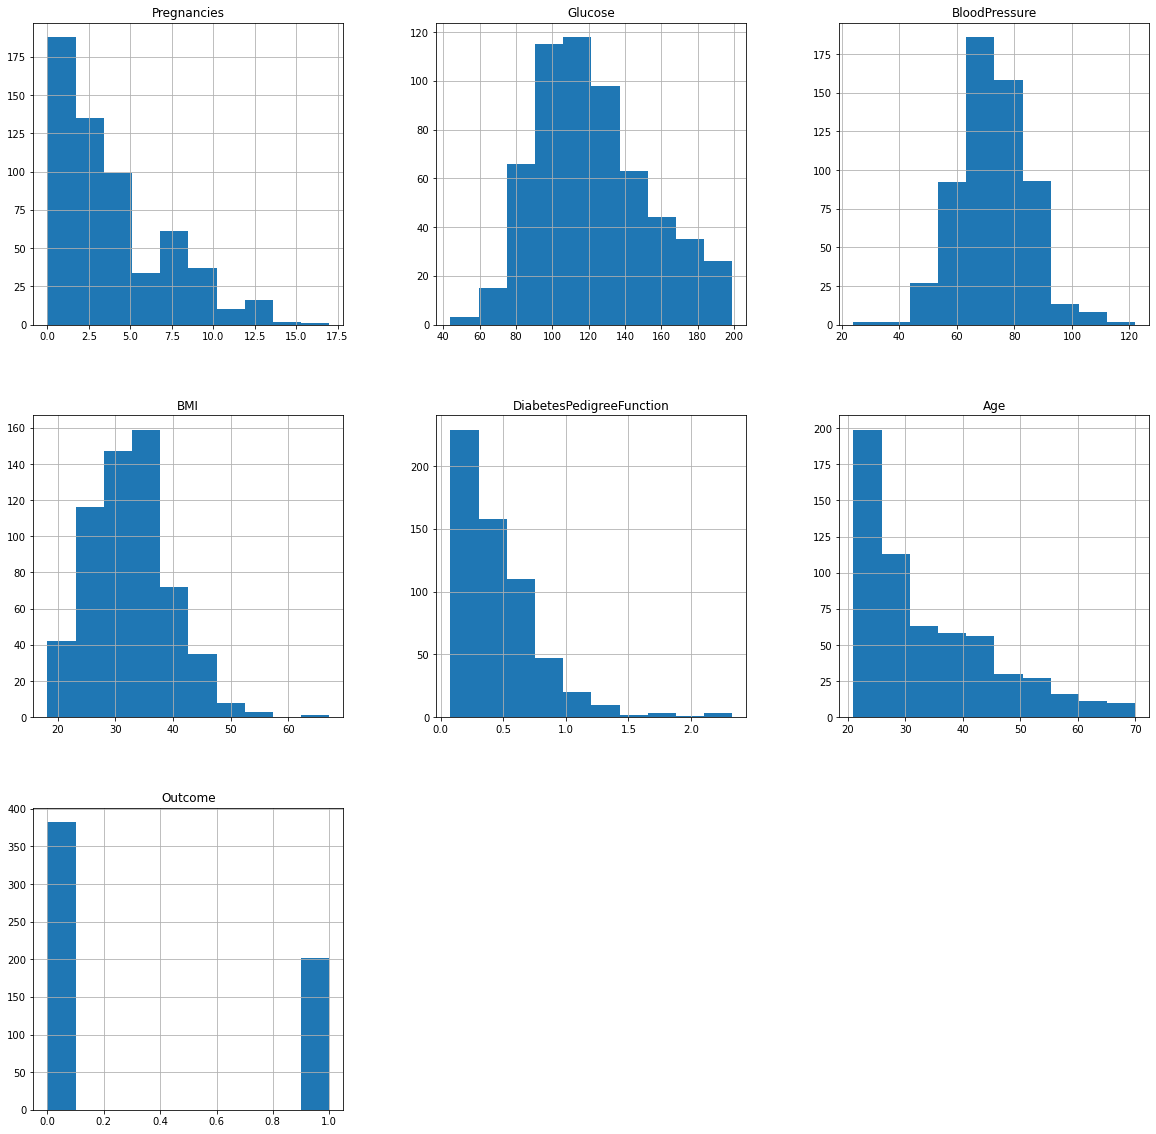

In [15]:
train[ (train['Glucose']!=0) & (train['BMI']!=0) & (train['BloodPressure']!=0)].hist(figsize=(20,20))

In [16]:
# t_Glu_median = train['Glucose'].median()
# t_BMI_median = train['BMI'].median()
# t_Blood_median = train['BloodPressure'].mean()

In [17]:
train['Glucose'].replace(0, train['Glucose'].median(),inplace=True)
train['BMI'].replace(0, train['Glucose'].median(),inplace=True)
train['BloodPressure'].replace(0, train['BloodPressure'].mean(),inplace=True)

In [18]:
train[train == 0].count()

Pregnancies                  92
Glucose                       0
BloodPressure                 0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     400
dtype: int64

In [19]:
test['Glucose'].replace(0, train['Glucose'].median(),inplace=True)
test['BMI'].replace(0, train['BMI'].median(),inplace=True)
test['BloodPressure'].replace(0, train['BloodPressure'].mean(),inplace=True)

<AxesSubplot:>

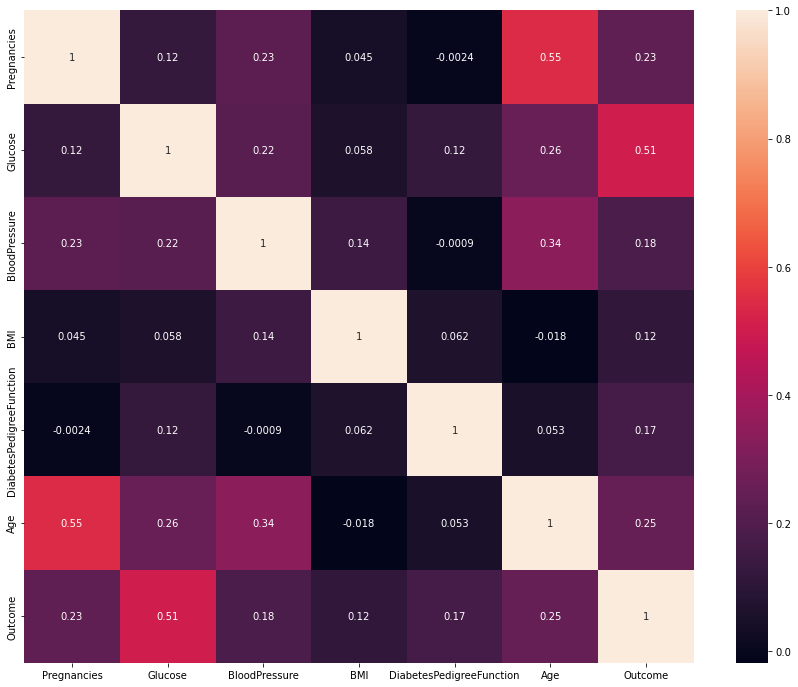

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(), annot=True)

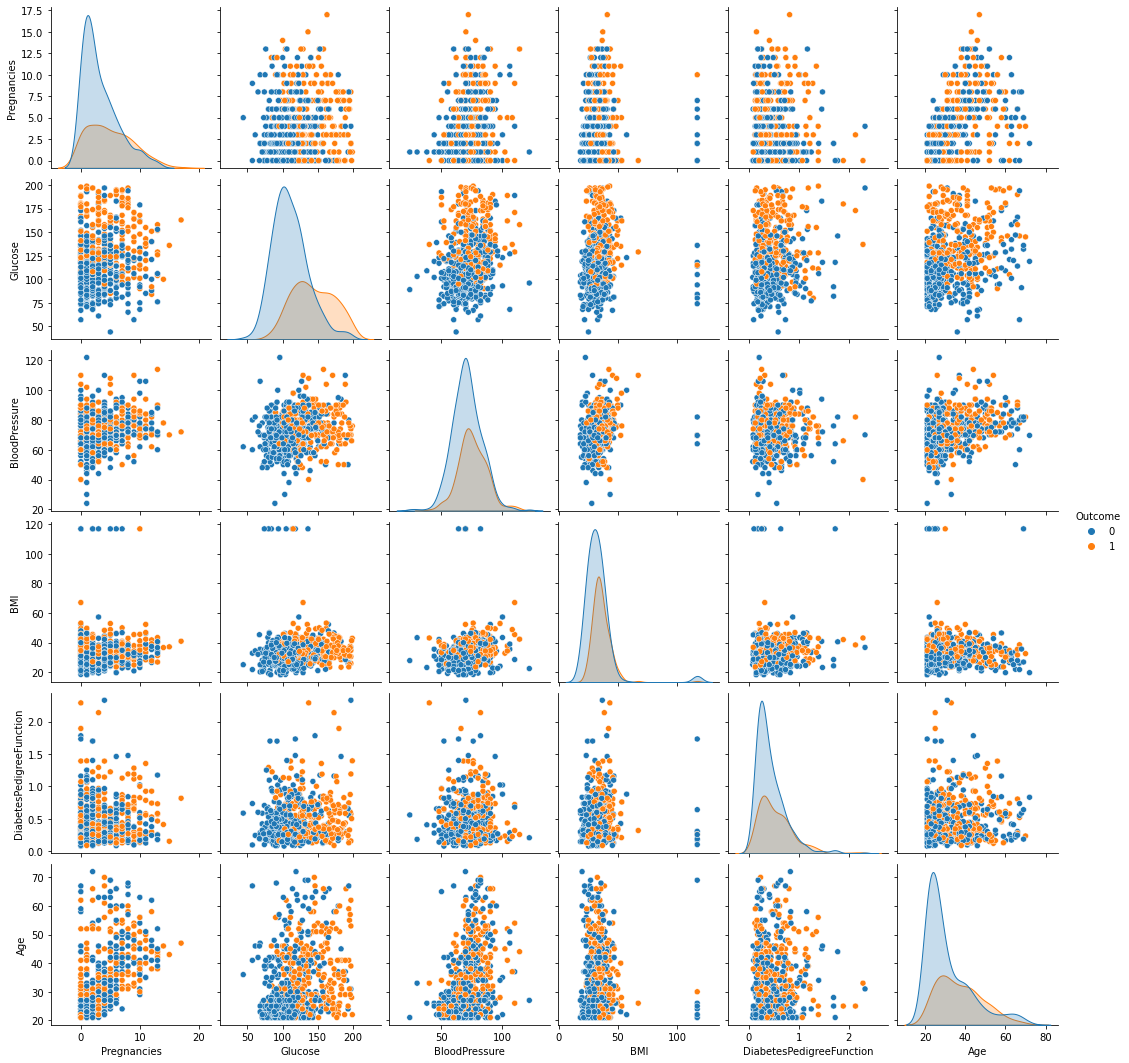

In [21]:
sns.pairplot(train, hue='Outcome')

<AxesSubplot:>

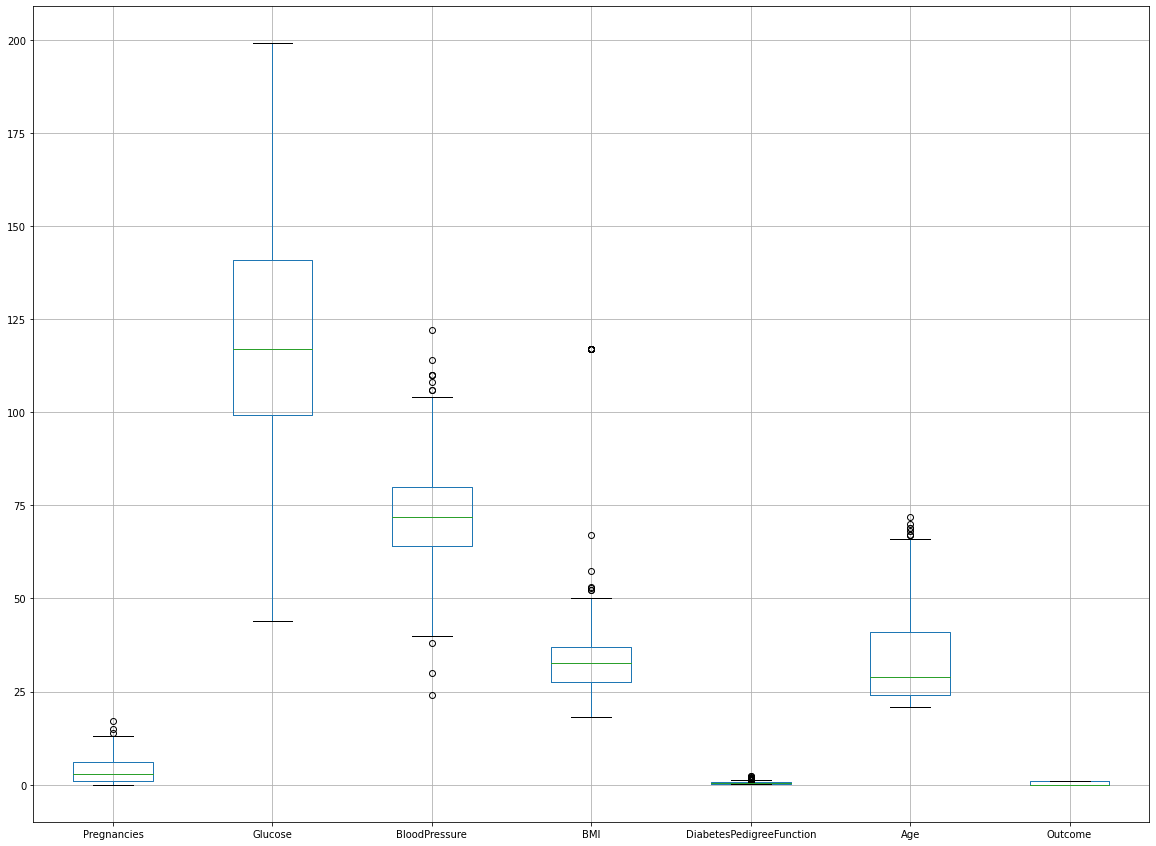

In [22]:
train.boxplot(figsize=(20,15))

# Modeling

In [23]:
X_train = train.drop('Outcome', axis=1)
y_train = train['Outcome']

X_test = test.drop('Outcome', axis=1)
y_test = test['Outcome']

### Train the model --------> Using (KNeighborsClassifier)
#### Then --> Predict 'Outcome' from train data NOT test data

In [24]:
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1.fit(X_train,y_train) # Learn
y_pred_training = knn1.predict(X_train)
# y_pred_training

In [25]:
print("accuracy_score train : ", accuracy_score(y_train,y_pred_training))

accuracy_score train :  0.8501628664495114


In [26]:
print(classification_report(y_train,y_pred_training))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       400
           1       1.00      0.57      0.73       214

    accuracy                           0.85       614
   macro avg       0.91      0.79      0.81       614
weighted avg       0.88      0.85      0.84       614



In [27]:
cm = confusion_matrix(y_train,y_pred_training)
cm

array([[400,   0],
       [ 92, 122]], dtype=int64)

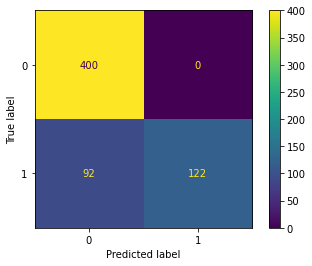

In [28]:
ConfusionMatrixDisplay(cm).plot()

### NOTE 
### I  will use sklearn.model_selection.GridSearchCV() ---> To use cross-validation and grid search together

#### 1- I will use sklearn.model_selection.GridSearchCV() to  predict the best parameter values for 'KNeighborsClassifier' in all (train data)

In [29]:
knn_params = {'n_neighbors': list(range(1,100))}
model = GridSearchCV( KNeighborsClassifier(), knn_params, cv=5, verbose=3 )
model.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.740 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.724 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.642 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.602 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.680 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.740 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.740 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.699 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.740 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.705 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.715 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

[CV 4/5] END ....................n_neighbors=24;, score=0.732 total time=   0.0s
[CV 5/5] END ....................n_neighbors=24;, score=0.770 total time=   0.0s
[CV 1/5] END ....................n_neighbors=25;, score=0.715 total time=   0.0s
[CV 2/5] END ....................n_neighbors=25;, score=0.837 total time=   0.0s
[CV 3/5] END ....................n_neighbors=25;, score=0.764 total time=   0.0s
[CV 4/5] END ....................n_neighbors=25;, score=0.724 total time=   0.0s
[CV 5/5] END ....................n_neighbors=25;, score=0.762 total time=   0.0s
[CV 1/5] END ....................n_neighbors=26;, score=0.715 total time=   0.0s
[CV 2/5] END ....................n_neighbors=26;, score=0.829 total time=   0.0s
[CV 3/5] END ....................n_neighbors=26;, score=0.756 total time=   0.0s
[CV 4/5] END ....................n_neighbors=26;, score=0.732 total time=   0.0s
[CV 5/5] END ....................n_neighbors=26;, score=0.770 total time=   0.0s
[CV 1/5] END ...............

[CV 1/5] END ....................n_neighbors=48;, score=0.715 total time=   0.0s
[CV 2/5] END ....................n_neighbors=48;, score=0.772 total time=   0.0s
[CV 3/5] END ....................n_neighbors=48;, score=0.764 total time=   0.0s
[CV 4/5] END ....................n_neighbors=48;, score=0.740 total time=   0.0s
[CV 5/5] END ....................n_neighbors=48;, score=0.779 total time=   0.0s
[CV 1/5] END ....................n_neighbors=49;, score=0.715 total time=   0.0s
[CV 2/5] END ....................n_neighbors=49;, score=0.780 total time=   0.0s
[CV 3/5] END ....................n_neighbors=49;, score=0.756 total time=   0.0s
[CV 4/5] END ....................n_neighbors=49;, score=0.756 total time=   0.0s
[CV 5/5] END ....................n_neighbors=49;, score=0.754 total time=   0.0s
[CV 1/5] END ....................n_neighbors=50;, score=0.715 total time=   0.0s
[CV 2/5] END ....................n_neighbors=50;, score=0.789 total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END ....................n_neighbors=70;, score=0.724 total time=   0.0s
[CV 2/5] END ....................n_neighbors=70;, score=0.805 total time=   0.0s
[CV 3/5] END ....................n_neighbors=70;, score=0.756 total time=   0.0s
[CV 4/5] END ....................n_neighbors=70;, score=0.740 total time=   0.0s
[CV 5/5] END ....................n_neighbors=70;, score=0.770 total time=   0.0s
[CV 1/5] END ....................n_neighbors=71;, score=0.724 total time=   0.0s
[CV 2/5] END ....................n_neighbors=71;, score=0.797 total time=   0.0s
[CV 3/5] END ....................n_neighbors=71;, score=0.764 total time=   0.0s
[CV 4/5] END ....................n_neighbors=71;, score=0.732 total time=   0.0s
[CV 5/5] END ....................n_neighbors=71;, score=0.770 total time=   0.0s
[CV 1/5] END ....................n_neighbors=72;, score=0.732 total time=   0.0s
[CV 2/5] END ....................n_neighbors=72;, score=0.797 total time=   0.0s
[CV 3/5] END ...............

[CV 5/5] END ....................n_neighbors=90;, score=0.762 total time=   0.0s
[CV 1/5] END ....................n_neighbors=91;, score=0.715 total time=   0.0s
[CV 2/5] END ....................n_neighbors=91;, score=0.805 total time=   0.0s
[CV 3/5] END ....................n_neighbors=91;, score=0.756 total time=   0.0s
[CV 4/5] END ....................n_neighbors=91;, score=0.732 total time=   0.0s
[CV 5/5] END ....................n_neighbors=91;, score=0.762 total time=   0.0s
[CV 1/5] END ....................n_neighbors=92;, score=0.724 total time=   0.0s
[CV 2/5] END ....................n_neighbors=92;, score=0.789 total time=   0.0s
[CV 3/5] END ....................n_neighbors=92;, score=0.748 total time=   0.0s
[CV 4/5] END ....................n_neighbors=92;, score=0.724 total time=   0.0s
[CV 5/5] END ....................n_neighbors=92;, score=0.770 total time=   0.0s
[CV 1/5] END ....................n_neighbors=93;, score=0.724 total time=   0.0s
[CV 2/5] END ...............

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=3)

* Attributes can show

In [30]:
model.best_params_

{'n_neighbors': 13}

In [31]:
# model.cv_results_
# model.cv_results_.keys()
# model.best_score_    # this score in all (tain data => X_train + y_train) NOT (X_train only) So it is LOW
knn2 = model.best_estimator_
knn2

KNeighborsClassifier(n_neighbors=13)

##### Predict 'Outcome' from train data

In [32]:
y_pred_training = knn2.predict(X_train)
# y_pred_training
print(classification_report(y_train,y_pred_training))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       400
           1       0.71      0.67      0.69       214

    accuracy                           0.79       614
   macro avg       0.77      0.76      0.76       614
weighted avg       0.79      0.79      0.79       614



### Train the model --------> Using (SVC)
#### Then --> Predict 'Outcome' from train data NOT test data

In [33]:
svc1 = SVC()
svc1.fit(X_train,y_train) # Learn
y_pred_training = svc1.predict(X_train)
# y_pred_traing

In [34]:
print("accuracy_score train : ", accuracy_score(y_train,y_pred_training))

accuracy_score train :  0.7638436482084691


In [35]:
print(classification_report(y_train,y_pred_training))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       400
           1       0.72      0.52      0.61       214

    accuracy                           0.76       614
   macro avg       0.75      0.71      0.72       614
weighted avg       0.76      0.76      0.75       614



#### 2- I will use sklearn.model_selection.GridSearchCV() to  predict the best parameter values for 'SVC' in all (train data)

In [36]:
svc_params = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 5, 10], 'degree':[2, 3, 5]}
model = GridSearchCV( SVC(), svc_params, cv=5, verbose=3 )
model.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ......C=1, degree=2, kernel=linear;, score=0.715 total time=   0.0s
[CV 2/5] END ......C=1, degree=2, kernel=linear;, score=0.764 total time=   0.1s
[CV 3/5] END ......C=1, degree=2, kernel=linear;, score=0.764 total time=   0.0s
[CV 4/5] END ......C=1, degree=2, kernel=linear;, score=0.724 total time=   0.0s
[CV 5/5] END ......C=1, degree=2, kernel=linear;, score=0.811 total time=   0.1s
[CV 1/5] END .........C=1, degree=2, kernel=rbf;, score=0.724 total time=   0.0s
[CV 2/5] END .........C=1, degree=2, kernel=rbf;, score=0.789 total time=   0.0s
[CV 3/5] END .........C=1, degree=2, kernel=rbf;, score=0.748 total time=   0.0s
[CV 4/5] END .........C=1, degree=2, kernel=rbf;, score=0.740 total time=   0.0s
[CV 5/5] END .........C=1, degree=2, kernel=rbf;, score=0.779 total time=   0.0s
[CV 1/5] END ........C=1, degree=2, kernel=poly;, score=0.715 total time=   0.0s
[CV 2/5] END ........C=1, degree=2, kernel=poly

[CV 1/5] END .....C=10, degree=3, kernel=linear;, score=0.715 total time=   0.9s
[CV 2/5] END .....C=10, degree=3, kernel=linear;, score=0.772 total time=   1.0s
[CV 3/5] END .....C=10, degree=3, kernel=linear;, score=0.772 total time=   0.9s
[CV 4/5] END .....C=10, degree=3, kernel=linear;, score=0.724 total time=   1.0s
[CV 5/5] END .....C=10, degree=3, kernel=linear;, score=0.811 total time=   1.3s
[CV 1/5] END ........C=10, degree=3, kernel=rbf;, score=0.715 total time=   0.0s
[CV 2/5] END ........C=10, degree=3, kernel=rbf;, score=0.813 total time=   0.0s
[CV 3/5] END ........C=10, degree=3, kernel=rbf;, score=0.756 total time=   0.0s
[CV 4/5] END ........C=10, degree=3, kernel=rbf;, score=0.772 total time=   0.0s
[CV 5/5] END ........C=10, degree=3, kernel=rbf;, score=0.779 total time=   0.0s
[CV 1/5] END .......C=10, degree=3, kernel=poly;, score=0.707 total time=   0.0s
[CV 2/5] END .......C=10, degree=3, kernel=poly;, score=0.789 total time=   0.0s
[CV 3/5] END .......C=10, de

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10], 'degree': [2, 3, 5],
                         'kernel': ('linear', 'rbf', 'poly')},
             verbose=3)

* Attributes can show

In [37]:
model.best_params_             # Why Kernel is rbf not linear!!!!?

{'C': 5, 'degree': 2, 'kernel': 'rbf'}

In [38]:
# model.cv_results_
# model.cv_results_.keys()
# model.best_score_    # this score in all (tain data => X_train + y_train) NOT (X_train only) So it is LOW
svc2 = model.best_estimator_
svc2

SVC(C=5, degree=2)

##### Predict 'Outcome' from train data

In [39]:
y_pred_training = svc2.predict(X_train)
# y_pred_training
print(classification_report(y_train,y_pred_training))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       400
           1       0.73      0.56      0.63       214

    accuracy                           0.77       614
   macro avg       0.76      0.72      0.73       614
weighted avg       0.77      0.77      0.77       614



### NOTE
### When we need to do more than one scaling in our model ----->  we Should use pipeline to make code easy

### 1- Train the model --------> Using (KNeighborsClassifier),
### But do scaling "StandardScaler" in first step
#### Then --> Predict 'Outcome' from train data NOT test data

In [40]:
pip_knn = pip = Pipeline(steps=[( 'scaler',StandardScaler() ), ( 'knn', KNeighborsClassifier(n_neighbors=13) )])

In [41]:
pip_knn.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=13))])

In [42]:
y_pred_training = pip_knn.predict(X_train)
print(classification_report(y_train, y_pred_training))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       400
           1       0.74      0.62      0.68       214

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.79      0.79       614



### 2- Train the model --------> Using (SVC),
### But do scaling "StandardScaler" in first step
#### Then --> Predict 'Outcome' from train data NOT test data

In [43]:
pip_svc = pip = Pipeline(steps=[( 'scaler',StandardScaler() ), ( 'svc', SVC(C=5, degree=2, kernel='rbf') )])

In [44]:
pip_svc.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=5, degree=2))])

In [45]:
y_pred_training = pip_svc.predict(X_train)
print(classification_report(y_train, y_pred_training))     # Why accuracy so high!!!!?

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       400
           1       0.83      0.72      0.77       214

    accuracy                           0.85       614
   macro avg       0.85      0.82      0.83       614
weighted avg       0.85      0.85      0.85       614



### NOTE 
### From last two reports --> I can know that (SVC) after scaling best than (KNeighborsClassifier) after scaling in "train data"

#### Predict 'Outcome' from test data using (KNeighborsClassifier) after scaling

In [46]:
y_pred_test = pip_knn.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.68      0.50      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.69       154
weighted avg       0.73      0.74      0.73       154



#### Predict 'Outcome' from test data using (SVC) after scaling

In [47]:
y_pred_test = pip_svc.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.68      0.48      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



### NOTE 
### From last two reports --> I think that (KNeighborsClassifier) after scaling best than (SVC) after scaling in "test data"

In [49]:
# X_train = train.drop('Outcome', axis=1)
# y_train = train['Outcome']

# X_test = test.drop('Outcome', axis=1)
# y_test = test['Outcome']

### 1- Train the model --------> Using (DecisionTreeClassifier)
#### Then --> Predict 'price' from train data Then test data

In [50]:
from sklearn.metrics import accuracy_score, fbeta_score, r2_score

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

clf1 = DecisionTreeClassifier()    # max_depth=5, min_samples_leaf=4

clf1.fit(X_train,y_train) # Learn
y_pred_training = clf1.predict(X_train)
# y_pred_training
print("accuracy_score train : ", accuracy_score(y_train,y_pred_training) * 100)

accuracy_score train :  100.0


In [61]:
# print( export_text(clf1, feature_names=list(X_train.columns)) )

In [62]:
# fig = plt.figure(figsize=(80,80))
# plot_tree( clf1, feature_names=list(X_train.columns), #class_names=list(df['Outcome'].keys()), filled=True ) 
# plt.show()

In [64]:
y_pred_test = clf1.predict(X_test)
print("accuracy_score test : ", accuracy_score(y_test,y_pred_test)* 100) 

accuracy_score test :  69.48051948051948


### 2- Train the model --------> Using (RandomForestClassifier)
#### Then --> Predict 'price' from train data Then test data

In [66]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(random_state=42, oob_score=True)

clf2.fit(X_train,y_train) # Learn
y_pred_training = clf2.predict(X_train)
# y_pred_training
print("accuracy_score train : ", accuracy_score(y_train,y_pred_training) * 100)  

accuracy_score train :  100.0


In [68]:
print(clf2.oob_score_ * 100)

76.0586319218241


In [67]:
y_pred_test = clf2.predict(X_test)
print("accuracy_score test : ", accuracy_score(y_test,y_pred_test)* 100) 

accuracy_score test :  77.27272727272727


### 3- Train the model --------> Using (AdaBoostClassifier)
#### Then --> Predict 'price' from train data Then test data

In [70]:
from sklearn.ensemble import AdaBoostClassifier

clf3 = AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=1)

clf3.fit(X_train,y_train) # Learn
y_pred_training = clf3.predict(X_train)
# y_pred_training
print("accuracy_score train : ", accuracy_score(y_train,y_pred_training) * 100)

accuracy_score train :  82.57328990228014


In [71]:
y_pred_test = clf3.predict(X_test)
print("accuracy_score test : ", accuracy_score(y_test,y_pred_test)* 100) 

accuracy_score test :  77.27272727272727


### 4- Train the model --------> Using (GradientBoostingClassifier)
#### Then --> Predict 'price' from train data Then test data

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

clf4 = GradientBoostingClassifier(random_state=0) # learning_rate=0.5
clf4.fit(X_train,y_train) # Learn
y_pred_training = clf4.predict(X_train)
# y_pred_training
print("accuracy_score train : ", accuracy_score(y_train,y_pred_training) * 100)

accuracy_score train :  93.15960912052117


In [74]:
y_pred_test = clf4.predict(X_test)
print("accuracy_score test : ", accuracy_score(y_test,y_pred_test)* 100) 

accuracy_score test :  75.97402597402598


<a id='conclusion'></a>
## Conclusion
#### I think that 'AdaBoostClassifier' is the best algorithm